IMPORT LIBRARY DAN UPLOAD FILE CSV

In [14]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

#read the csv file into a dataframe
df = pd.read_csv("tessssssssss.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'tessssssssss.csv'

MELIHAT JUMLAH DATA SECARA BARIS DAN KOLOM

In [ ]:
df.shape

(1288, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tanggal      1288 non-null   object
 1   pm10         1288 non-null   int64 
 2   so2          1288 non-null   int64 
 3   co           1288 non-null   int64 
 4   o3           1288 non-null   int64 
 5   no2          1288 non-null   int64 
 6   max          1288 non-null   int64 
 7   critical     1288 non-null   object
 8   categori     1288 non-null   object
 9   lokasi_spku  1288 non-null   object
dtypes: int64(6), object(4)
memory usage: 100.8+ KB


MELIHAT CUPLIKAN DARI DATA

In [ ]:
df.head()

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,1/8/2018,86,31,21,129,24,129,o3,TIDAK SEHAT,DKI5
1,2/8/2018,68,31,18,207,20,207,o3,SANGAT TIDAK SEHAT,DKI5
2,3/8/2018,68,32,16,211,17,211,o3,SANGAT TIDAK SEHAT,DKI2
3,4/8/2018,59,31,16,194,16,194,o3,TIDAK SEHAT,DKI5
4,5/8/2018,65,35,14,203,16,203,o3,SANGAT TIDAK SEHAT,DKI2


MEMBAGI DATA MENJADI DATA TRAIN DAN TEST

In [ ]:
train,test = train_test_split(df, test_size=0.2, random_state=1 )

In [ ]:
print(train.shape,test.shape)

(1030, 10) (258, 10)


MENGOLAH DATA TRAIN

In [ ]:
train.isnull().sum()

tanggal        0
pm10           0
so2            0
co             0
o3             0
no2            0
max            0
critical       0
categori       0
lokasi_spku    0
dtype: int64

In [ ]:
train.describe()

,pm10,so2,co,o3,no2,max
count,1030.000000,1030.00000,1030.000000,1030.000000,1030.000000,1030.000000
mean,63.058252,35.32233,21.604854,91.249515,19.804854,96.498058
std,15.044621,13.50143,10.067227,45.291120,11.960730,41.162286
min,21.000000,13.00000,0.000000,20.000000,3.000000,41.000000
25%,55.000000,25.00000,16.000000,55.000000,13.000000,66.000000
50%,64.000000,31.00000,20.000000,80.000000,16.000000,83.000000
75%,72.000000,43.00000,25.000000,119.000000,22.000000,119.000000
max,179.000000,126.00000,88.000000,243.000000,104.000000,243.000000


EXPLORATORY DATA ANALYST

Text(0.5, 1.0, 'Features Correlating with Max')

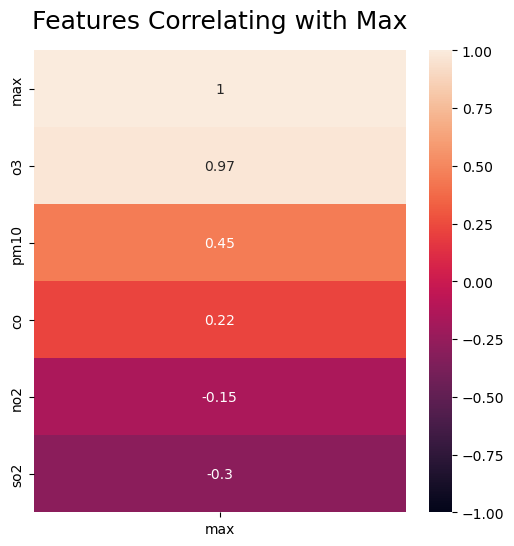

In [ ]:
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(train.corr()[['max']].sort_values(by='max', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Max', fontdict={'fontsize':18}, pad=16)

In [ ]:
pollutants = ['co','no2', 'o3', 'so2', 'pm10']

In [ ]:
# Correlation Between Pollutants
correlation_matrix = train[pollutants].corr()
fig = px.imshow(correlation_matrix, x=pollutants, 
                 y=pollutants, title="Correlation Between Pollutants")
fig.show()

In [ ]:
kategori_colors = {
    'BAIK': 'blue',
    'SANGAT TIDAK SEHAT': 'red',
    'SEDANG': 'green',
    'TIDAK SEHAT': 'purple'
}

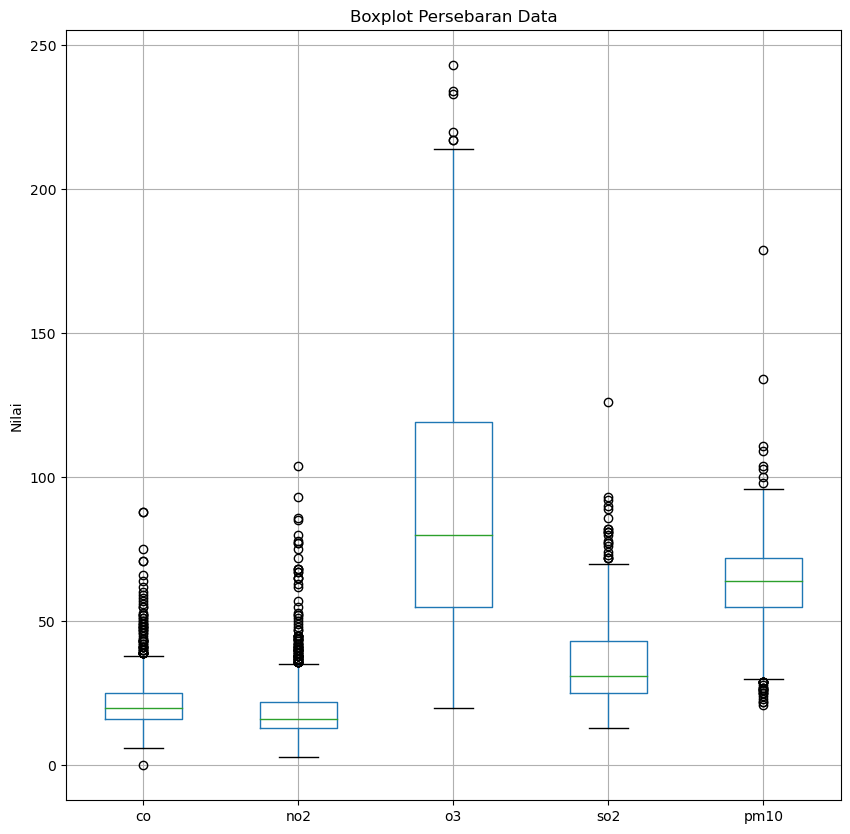

In [ ]:
plt.figure(figsize=(10, 10))
train.boxplot(column=['co','no2', 'o3', 'so2', 'pm10'])

# Menambahkan label
plt.title('Boxplot Persebaran Data')
plt.ylabel('Nilai')

# Tampilkan boxplot
plt.show()

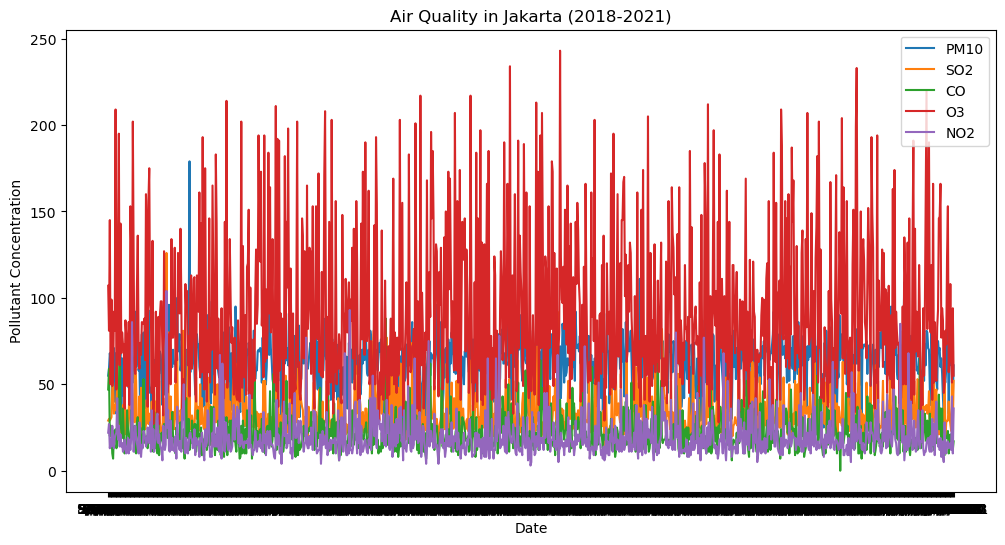

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=train, x='tanggal', y='pm10', label='PM10')
sns.lineplot(data=train, x='tanggal', y='so2', label='SO2')
sns.lineplot(data=train, x='tanggal', y='co', label='CO')
sns.lineplot(data=train, x='tanggal', y='o3', label='O3')
sns.lineplot(data=train, x='tanggal', y='no2', label='NO2')
plt.xlabel('Date')
plt.ylabel('Pollutant Concentration')
plt.title('Air Quality in Jakarta (2018-2021)')
plt.legend()
plt.show()

c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



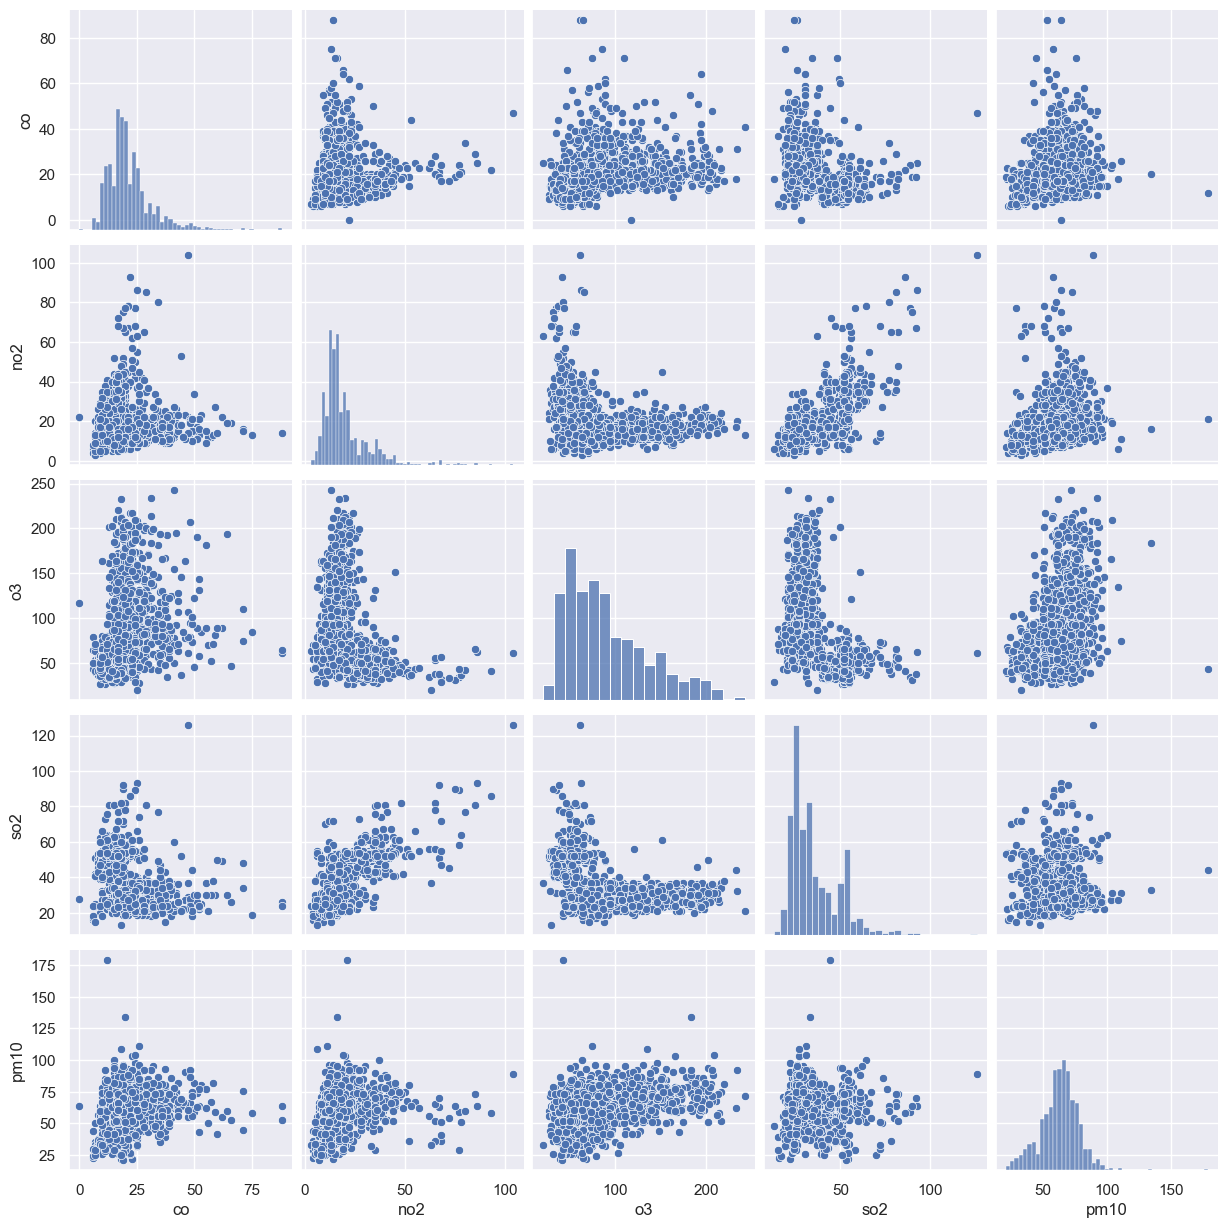

In [ ]:
sns.set()
sns.pairplot(train[pollutants], size = 2.5)
plt.show()

In [ ]:
# Define pollutants and their colors
pollutant_colors = px.colors.qualitative.Plotly

# Calculate the sum of pollutant concentrations
total_concentrations = train[pollutants].sum()

# Create a DataFrame for the concentrations
concentration_data = pd.DataFrame({
    "Pollutant": pollutants,
    "Concentration": total_concentrations
})

# Create a donut plot for pollutant concentrations
fig = px.pie(concentration_data, names="Pollutant", values="Concentration",
             title="Pollutant Concentrations in Jakarta",
             hole=0.4, color_discrete_sequence=pollutant_colors)

# Update layout for the donut plot
fig.update_traces(textinfo="percent+label")
fig.update_layout(legend_title="pollutants")

fig.show()

Mengolah Skewness

In [ ]:
train.skew()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Plot histogram untuk setiap kolom
sns.histplot(train['co'], kde=True, ax=axes[0, 0]).set(title=f'Distribusi CO')
sns.histplot(train['no2'], kde=True, ax=axes[0, 1]).set(title=f'Distribusi NO2')
sns.histplot(train['so2'], kde=True, ax=axes[0, 2]).set(title=f'Distribusi PM10')
sns.histplot(train['pm10'], kde=True, ax=axes[1, 0]).set(title=f'Distribusi SO2')
sns.histplot(train['o3'], kde=True, ax=axes[1, 1]).set(title=f'Distribusi o3')

# Box plot untuk melihat distribusi lebih lanjut
#sns.boxplot(x=nama_kolom_co, data=df, ax=axes[1, 2]).set(title=f'Box Plot {nama_kolom_co}')

# Sesuaikan tata letak subplot
plt.tight_layout()

# Tampilkan plot
plt.show()

In [ ]:
def outlieratas(column_name):
    Q1=train[column_name].quantile(0.25)
    Q3=df[column_name].quantile(0.75)
    IQR=Q3-Q1
    Upper_Whisker = Q3+1.5*IQR
    return Upper_Whisker

def outlierbawah(column_name):
    Q1=train[column_name].quantile(0.25)
    Q3=df[column_name].quantile(0.75)
    IQR=Q3-Q1
    Lower_Whisker = Q1-1.5*IQR
    return Lower_Whisker


In [ ]:
train.drop(train[train['co'] == 88].index, inplace=True)
train.drop(train[train['so2'] == 126].index, inplace=True)
train.drop(train[train['pm10'] == 179].index, inplace=True)
train.drop(train[train['o3'] == 243].index, inplace=True)
train.drop(train[train['no2'] == 93].index, inplace=True)
train['co'] = train['co'].replace(0, train['co'].median())

In [ ]:
def handle_positive_outliers(column_name):
    outlier_threshold = outlieratas(column_name)
    outlier_mask = train[column_name] > outlier_threshold

    # Hitung mean dari kolom (tanpa outlier)
    mean_value = train[~outlier_mask][column_name].mean()

    # Ganti nilai outlier dengan mean
    train.loc[outlier_mask, column_name] = mean_value

def handle_negative_outliers(column_name):
    outlier_threshold = outlierbawah(column_name)
    outlier_mask = train[column_name] < outlier_threshold

    # Hitung mean dari kolom (tanpa outlier)
    mean_value = train[~outlier_mask][column_name].mean()

    # Ganti nilai outlier dengan mean
    train.loc[outlier_mask, column_name] = mean_value


In [ ]:
handle_positive_outliers('co')
handle_positive_outliers('no2')
handle_positive_outliers('so2')
handle_positive_outliers('o3')

In [ ]:
train['co']= np.sqrt(train['co'])
train['so2']= np.log1p(train['so2'])
train[['o3','no2']]= train[['o3','no2']].apply(lambda x: np.log(x))
train.skew()

DATA PREPROCESSING

In [ ]:
labelenc = LabelEncoder()

In [ ]:
train['categori'] = labelenc.fit_transform(train['categori'])
train['categori'].unique()

array([3, 2, 1, 0])

In [ ]:
train.head()

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
188,8/3/2018,55,29,47,107,22,107,o3,3,DKI5
189,9/3/2018,59,30,59,81,27,81,o3,2,DKI5
304,1/9/2018,68,29,20,145,13,145,o3,3,DKI5
776,2/6/2020,63,30,26,50,18,63,pm10,2,DKI2
694,9/15/2019,74,31,22,99,14,99,o3,2,DKI5


In [ ]:
X = train.drop(columns=["categori","lokasi_spku","tanggal","critical"])
y = train[["categori"]]


In [ ]:
testb = test.drop(columns=["categori","lokasi_spku","tanggal","critical"])

In [ ]:
X

,pm10,so2,co,o3,no2,max
188,55,29,47,107,22,107
189,59,30,59,81,27,81
304,68,29,20,145,13,145
776,63,30,26,50,18,63
694,74,31,22,99,14,99
...,...,...,...,...,...,...
715,88,27,21,108,16,108
905,61,23,17,64,12,64
1096,66,52,17,51,43,66
235,42,25,12,94,10,94


In [ ]:
y

,categori
188,3
189,2
304,3
776,2
694,2
...,...
715,3
905,2
1096,3
235,2


In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)
test_df_scaled = scaler.fit_transform(testb)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape, y_train.shape)

(824, 6) (824, 1)


In [ ]:
print(x_test.shape,y_test.shape)

(206, 6) (206, 1)


In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_scaled,y,test_size=0.2,random_state=0)

In [ ]:
training_score = []
testing_score = []

In [ ]:
def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    a = accuracy_score(y_train1,x_train_pred1)*100
    b = accuracy_score(y_test1,x_test_pred1)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test1,x_test_pred1,average='macro'))
    print(f"Recall Score of {model} model is:",recall_score(y_test1,x_test_pred1,average='macro'))
    print(f"F1 Score of {model} model is:",f1_score(y_test1,x_test_pred1,average='macro'))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 100.0
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 90.77669902912622

------------------------------------------------------------------------
Precision Score of DecisionTreeClassifier() model is: 0.8729668184775536
Recall Score of DecisionTreeClassifier() model is: 0.9507936507936507
F1 Score of DecisionTreeClassifier() model is: 0.9034768522237395

------------------------------------------------------------------------
Confusion Matrix of DecisionTreeClassifier() model is:


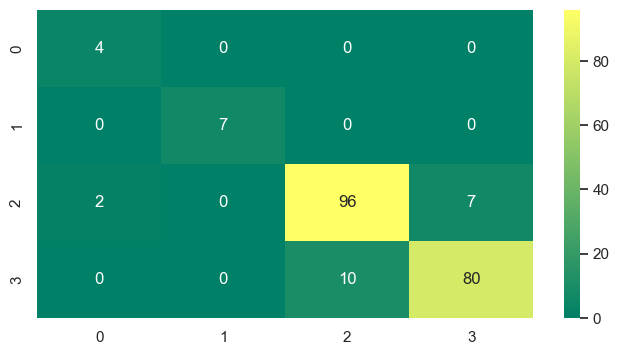

In [ ]:
model_prediction(DecisionTreeClassifier())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13708\517314366.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy_Score of RandomForestClassifier() model on Training Data is: 100.0
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 92.23300970873787

------------------------------------------------------------------------
Precision Score of RandomForestClassifier() model is: 0.8818261249453909
Recall Score of RandomForestClassifier() model is: 0.957936507936508
F1 Score of RandomForestClassifier() model is: 0.9111934686862175

------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier() model is:


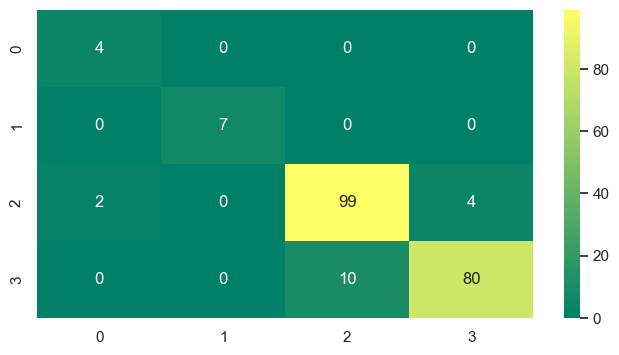

In [ ]:
model_prediction(RandomForestClassifier())

Accuracy_Score of GaussianNB() model on Training Data is: 81.31067961165049
Accuracy_Score of GaussianNB() model on Testing Data is: 81.55339805825243

------------------------------------------------------------------------
Precision Score of GaussianNB() model is: 0.6987745098039216
Recall Score of GaussianNB() model is: 0.8382936507936507
F1 Score of GaussianNB() model is: 0.7437463912946924

------------------------------------------------------------------------
Confusion Matrix of GaussianNB() model is:


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



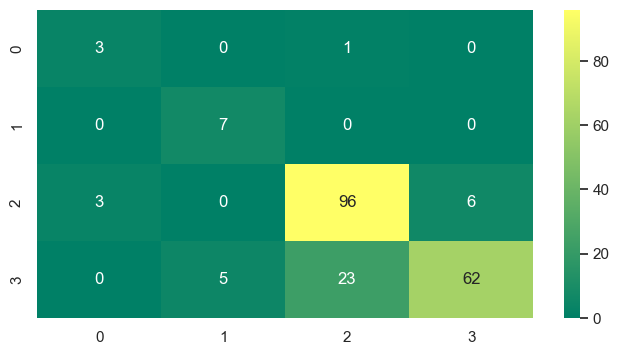

In [ ]:
model_prediction(GaussianNB())

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, thi

Accuracy_Score of KNeighborsClassifier() model on Training Data is: 92.83980582524272
Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 89.32038834951457

------------------------------------------------------------------------
Precision Score of KNeighborsClassifier() model is: 0.9463097398669087
Recall Score of KNeighborsClassifier() model is: 0.6628968253968254
F1 Score of KNeighborsClassifier() model is: 0.7332925259091965

------------------------------------------------------------------------
Confusion Matrix of KNeighborsClassifier() model is:


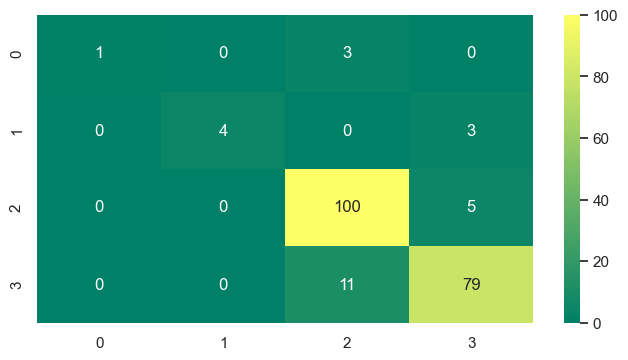

In [ ]:
model_prediction(KNeighborsClassifier())

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Accuracy_Score of AdaBoostClassifier() model on Training Data is: 87.62135922330097
Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 86.89320388349515

------------------------------------------------------------------------
Precision Score of AdaBoostClassifier() model is: 0.6988636363636364
Recall Score of AdaBoostClassifier() model is: 0.6861111111111111
F1 Score of AdaBoostClassifier() model is: 0.684894783520116

------------------------------------------------------------------------
Confusion Matrix of AdaBoostClassifier() model is:


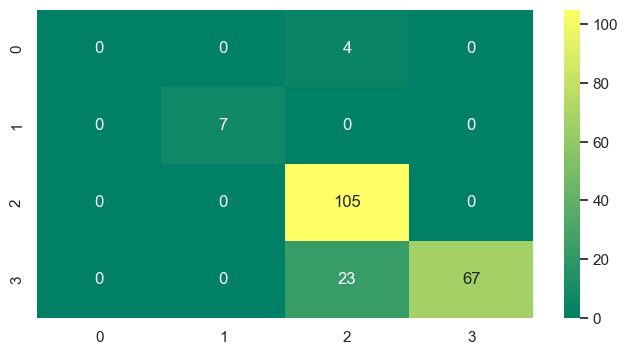

In [ ]:
model_prediction(AdaBoostClassifier())

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 100.0
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 91.2621359223301

------------------------------------------------------------------------
Precision Score of GradientBoostingClassifier() model is: 0.8753517316017315
Recall Score of GradientBoostingClassifier() model is: 0.9535714285714285
F1 Score of GradientBoostingClassifier() model is: 0.906099518459069

------------------------------------------------------------------------
Confusion Matrix of GradientBoostingClassifier() model is:


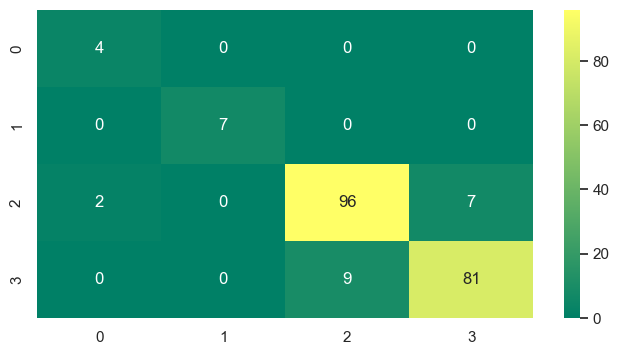

In [ ]:
model_prediction(GradientBoostingClassifier())

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(x_train,y_train)
pred1 = model.predict(x_test)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13708\1753296610.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
pred = model.predict(testb)


In [ ]:
testb["categori"]= pred
testb

,pm10,so2,co,o3,no2,max,categori
908,74,23,18,122,9,122,3
1087,69,53,13,58,26,69,3
491,71,47,16,132,25,132,3
267,57,25,21,77,15,77,2
460,56,27,27,86,10,86,2
...,...,...,...,...,...,...,...
531,78,27,24,92,19,92,2
154,73,27,11,125,19,125,3
663,64,32,18,178,14,178,3
579,55,22,32,104,22,104,3
